In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('../Datasets')
import Kyoto1, Kyoto2, Kyoto3, Aruba

In [2]:
def obtain_data(module):
    #Making the counts
    num_activities = len(module.ACTIVITIY_NAMES)
    data = module.obtaining_data()
    count = np.zeros(num_activities, dtype=int)
    for partition in data:
        for event in partition:
            count[event[-1]] += 1
    total = count.sum()
    normal_count = count / total * 100
    #Printing the header of the table
    print("\hline")
    print("\multirow{2}{*}{Activities} & \multirow{2}{*}{Number of sensor events} & \multirow{2}{*}{Relative frequency (\%)} \\\\")
    print("&  & \\\\")
    print("\hline")
    formatted_activity_names = [x.replace("_", " ") for x in module.ACTIVITIY_NAMES]
    for x in zip(formatted_activity_names, count, normal_count):
        print("%s & %d & %2.2f " % x, end="\\\\\n")
        print("\hline")

In [3]:
#Kyoto1
obtain_data(Kyoto1)

\hline
\multirow{2}{*}{Activities} & \multirow{2}{*}{Number of sensor events} & \multirow{2}{*}{Relative frequency (\%)} \\
&  & \\
\hline
Make a phone call & 1037 & 16.78 \\
\hline
Wash hands & 481 & 7.78 \\
\hline
Cook & 2172 & 35.15 \\
\hline
Eat & 882 & 14.27 \\
\hline
Clean & 1607 & 26.01 \\
\hline


In [4]:
#Kyoto2
obtain_data(Kyoto2)

\hline
\multirow{2}{*}{Activities} & \multirow{2}{*}{Number of sensor events} & \multirow{2}{*}{Relative frequency (\%)} \\
&  & \\
\hline
Make a phone call & 1019 & 19.75 \\
\hline
Wash hands & 458 & 8.88 \\
\hline
Cook & 2338 & 45.32 \\
\hline
Eat & 770 & 14.93 \\
\hline
Clean & 574 & 11.13 \\
\hline


In [5]:
#Kyoto3
obtain_data(Kyoto3)

\hline
\multirow{2}{*}{Activities} & \multirow{2}{*}{Number of sensor events} & \multirow{2}{*}{Relative frequency (\%)} \\
&  & \\
\hline
Fill medication dispenser & 550 & 8.01 \\
\hline
Wash DVD & 976 & 14.21 \\
\hline
Water plants & 975 & 14.20 \\
\hline
Answer the phone & 403 & 5.87 \\
\hline
Prepare birthday card & 766 & 11.16 \\
\hline
Prepare soup & 1066 & 15.53 \\
\hline
Clean & 1611 & 23.46 \\
\hline
Choose outfit & 519 & 7.56 \\
\hline


In [6]:
#Aruba
obtain_data(Aruba)

\hline
\multirow{2}{*}{Activities} & \multirow{2}{*}{Number of sensor events} & \multirow{2}{*}{Relative frequency (\%)} \\
&  & \\
\hline
Meal Preparation & 292158 & 36.86 \\
\hline
Relax & 374743 & 47.28 \\
\hline
Eating & 16651 & 2.10 \\
\hline
Work & 17637 & 2.23 \\
\hline
Sleeping & 63792 & 8.05 \\
\hline
Wash Dishes & 10594 & 1.34 \\
\hline
Bed to Toilet & 1483 & 0.19 \\
\hline
Enter Home & 2041 & 0.26 \\
\hline
Leave Home & 1954 & 0.25 \\
\hline
Housekeeping & 10938 & 1.38 \\
\hline
Respirate & 571 & 0.07 \\
\hline


[[20391. 42284. 46896. 37826. 42868. 40674.     0.     0.]
 [27969. 45218. 52198. 57203. 64328. 60672.     0.     0.]
 [ 3184.  2771.  2922.  2336.  1651.  1432.     0.     0.]
 [ 3856.  1929.  1293.  2877.  1719.  2121.     0.     0.]
 [11992. 10954. 10442.  8416.  7816.  6883.     0.     0.]
 [ 2357.  1650.  3203.   986.  1226.   643.     0.     0.]
 [  330.   310.   157.   138.   180.   157.     0.     0.]
 [  314.   348.   225.   185.   218.   232.     0.     0.]
 [  310.   341.   282.   227.   155.   213.     0.     0.]
 [ 6475.  2924.  1011.   528.     0.     0.     0.     0.]
 [   91.   132.     0.     0.     0.   185.     0.     0.]]


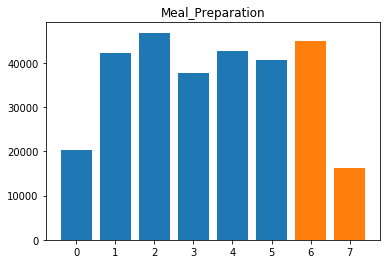

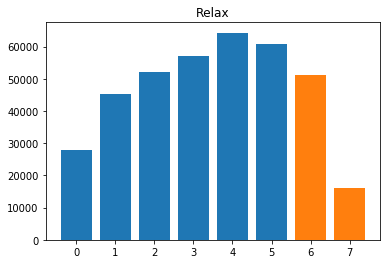

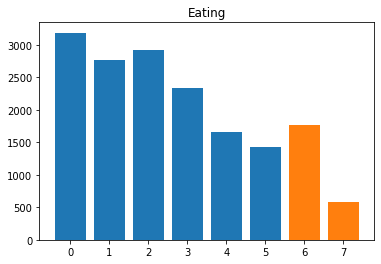

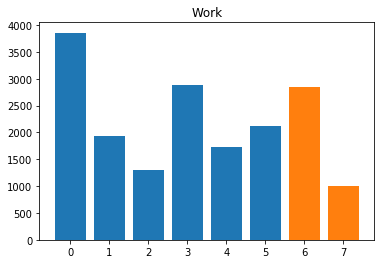

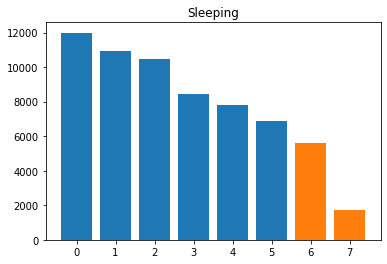

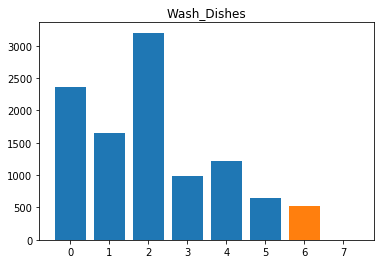

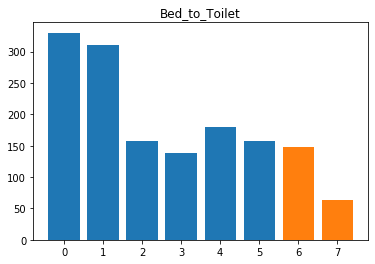

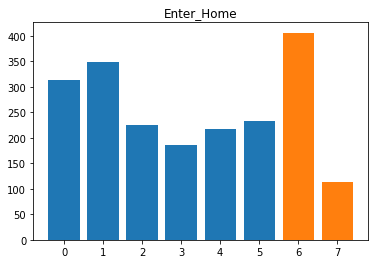

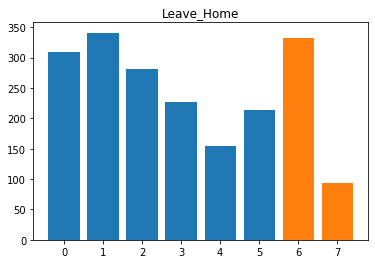

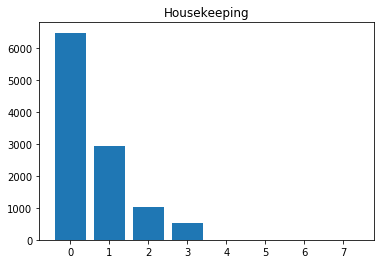

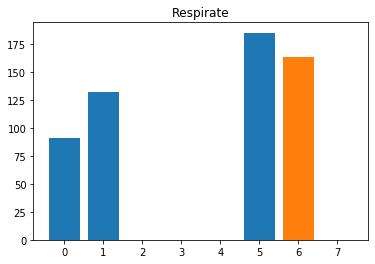

In [3]:
#Aruba histogram
def date_to_number(d):
    if d.year == 2010:
        return d.month - 11
    else:
        return d.month + 1

training_int_data, testing_int_data = Aruba.obtaining_data_continuos()
training_count = np.zeros((len(Aruba.ACTIVITIY_NAMES), 8))
testing_count = np.zeros((len(Aruba.ACTIVITIY_NAMES), 8))
for partition in training_int_data:
    for event in partition:
        training_count[event[-1], date_to_number(event[0])] += 1
for partition in testing_int_data:
    for event in partition:
        testing_count[event[-1], date_to_number(event[0])] += 1

print(training_count)

for i, row in enumerate(training_count):
    plt.figure()
    plt.bar(np.arange(8), row)
    plt.bar(np.arange(8), testing_count[i])
    plt.title(Aruba.ACTIVITIY_NAMES[i])
    plt.show()